In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import ipywidgets as widgets
from IPython import display

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sys
sys.path.append('/h/ashlie/jupyter_helpers')
import plot_helper as ph

import os

In [42]:
large_fig_dim = (15, 10.6)

# time ms in msec, latency us in nsec.
base_path = '/h/ashlie/random-res'
latf = '_lat.log'

sleeps = {
    1000,
    2500,
    5000,
    7500,
    10000,
}

files = {}

for sleep in sleeps:
    files[sleep] = os.path.join(base_path, 's' + str(sleep) + latf)

In [56]:
dfs = {}
data = {}

In [57]:
for k, v in files.iteritems():
    dfs[k] = pd.read_csv(v, sep=',', names=['io num', 'latency (ns)', 'bs', 'current queue depth', 'complete batch'])
    if k not in data:
        data[k] = {}

    data[k]['average latency time (us)'] = (dfs[k]['latency (ns)'] / 1000).mean()

In [59]:
data = {
    'average latency (us)': [],
    'number of iterations': [],
}
for k, df in dfs.iteritems():
    #print(str(k) + ':\n' + str(df['latency (ns)'].describe()) + '\n')
    data['average latency (us)'].append(df['latency (ns)'].mean() / 1000)
    data['number of iterations'].append(k)

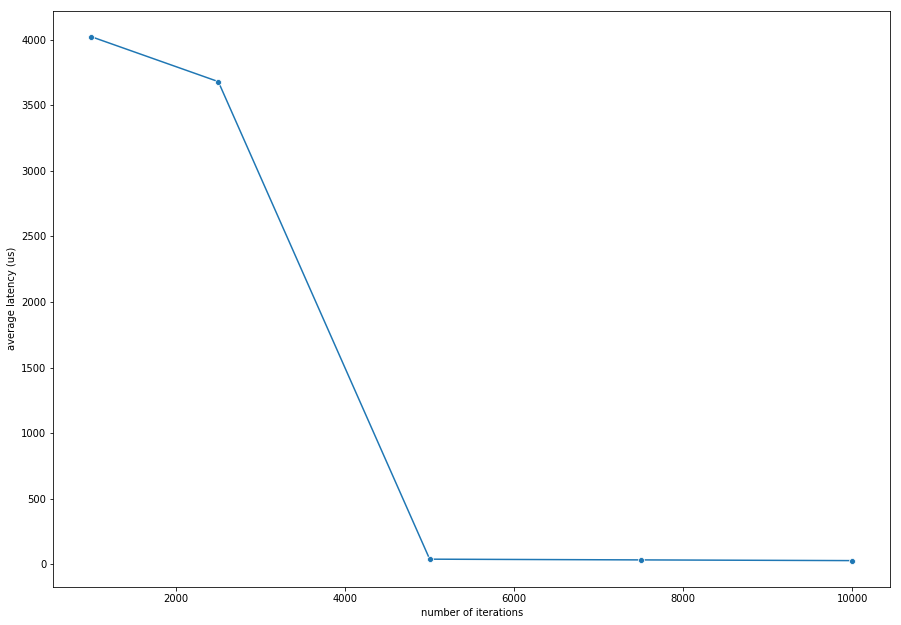

In [60]:
avgData = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='number of iterations', y='average latency (us)', data=avgData, marker='o', ax=ax)

In [55]:
pd.read_csv(v, sep=',', names=['latency (ns)', 'rc'])['latency (ns)'].describe()

count    1000000.000000
mean           1.015692
std            0.126102
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max            3.000000
Name: latency (ns), dtype: float64